<a href="https://colab.research.google.com/github/VamK2/Data-Science-Machine-Learning/blob/main/VamsiK2_Exploratory_Data_Analysis_FoodHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Exploratory Data Analysis - FoodHub**


## **Context**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

## **Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

## **Data Description**

The data contains the different data related to a food order. The detailed data dictionary is given below.

## **Data Dictionary**

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import the required libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#pd.options.display.float_format = '{:.0f}'.format
pd.options.mode.chained_assignment = None

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/Supervised Learning/Linear Regression/auto-mpg.csv') ## Code to read the data
# Returns the first 5 rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Check the shape of the dataset
df.shape

(1898, 9)

In [ ]:
print('The data file has',df.shape[0],'Rows and',df.shape[1],'Columns')

The data file has 1898 Rows and 9 Columns


#### Observations:
1.   The **DataFrame has 1898 Rows and 9 Columns**.
2.   One striking item in the above dataframe view is **'rating'** column which does not have ratings, instead those are shown as **'Not given' for the first two records**. We may need to further analyze, to see if we need to apply any kind of data handling approaches, if needed.

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are a **total of 1898 entries with 9 Columns**, out of which, there are **4 integer (int64), 1 float (float64) and 4 object (Objects) type** data items in the file.
* The 'rating' column can be converted numeric data type to perform numberical analysis.
* Following **2 variables, Order ID, and Customer ID are categorical variables but labelled as numeric variables**.
* **All columns are non-null, meaning there are no null values**, so we do not need to treat null values.

In [ ]:
# Checking for missing values in the data
print(df.isnull().sum()) # Function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


* Observations:
* **There are no missing values** in the dataframe. Previous code cell output as well confirms that all columns have non-null values.
* Though there are no misisng values, we decided to **Convert following 3 objects to Categories, to improve the processing speed and reduce the storage space**.

In [ ]:
# Though there are no misisng values, we decided to Convert following 3 objects to Categories, to improve the processing speed and reduce the storage space.

df.restaurant_name = df.restaurant_name.astype('category') # Convert restaurant name from object to category
df.cuisine_type = df.cuisine_type.astype('category') # Convert cuisine type from object to category
df.day_of_the_week = df.day_of_the_week.astype('category') # Convert day of the week from object to category

# Using the info() method to print a concise summary of the DataFrame
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:

* The output confirms that **all columns have non-null valueThere are no missing values.**
* The 'rating' has 'Not given' values, and we should not convert these values to Zeros or, manipulate data by replacing with mean, median or mode in this particular situation as **'Not given' means the customer has not rated the order for any reason for respective orders_Ids**. We should **convert the rating column to int data type, so we can perform numberical operations on this item.**
* Following columns have been converted to categories: **restaurant_name , cuisine_type , day_of_the_week converted to categories**, to improve the processing speed and reduce the storage space.

In [ ]:
# Get the summary statistics of the numerical data
df.describe().round(2) ## Function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

# df.describe(include='all').T

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.00,1898.00,1898.00,1898.00,1898.00
mean,1477495.50,171168.48,16.50,27.37,24.16
std,548.05,113698.14,7.48,4.63,4.97
min,1476547.00,1311.00,4.47,20.00,15.00
25%,1477021.25,77787.75,12.08,23.00,20.00
50%,1477495.50,128600.00,14.14,27.00,25.00
75%,1477969.75,270525.00,22.30,31.00,28.00
max,1478444.00,405334.00,35.41,35.00,33.00


#### Observations:
* **Total count of observations** in the dataframe are **1898**.
* Cost Of the Order: **Average cost of the order** is **15 dollars**, **25% of orders** are around **12 dollars**, **50% of the orders cost** is **14.14 dollars**, **75% cost of the orders** are at **22.30 dollars**. The **Standard Deviation** between the cost of orders is **7.48 dollars**.
* Food Preparation Time:
* The **Average Food preparation time** is approximately **27.37 mintues** and the prep time is **ranging from 20 to 35 minutes**.The **Standard Deviation** of prep time is **4.63 minutes**.
* Delivery Time: The **delivery time is ranging** from **15 to 33 minutes** and the **average time to deliver** the food is approximately **24.16 minutes** with a **Standard Deviation** of **4.97 minutes**.


In [ ]:
df['rating'].value_counts() ## Code

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

* Observations:
* There are **736** orders that are **Not rated** out of total 1898 orders, i.e **38.77%** of the orders were not rated.
* *Again, 'Not given' means the customer has not reated the respective order and it is not a missing value. We can imrove customer participation by offering incentives or making the rating option on the UI easy to use or any other UI User Experience improvment to rate the order.*

## **Exploratory Data Analysis (EDA)**

## **Univariate Analysis**

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

* Observations: The **number of unique order_ids** in this dataframe is **1898**

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  ## Code to find out number of unique Customer ID

1200

* Observations: The **number of unique customer_ids** in this dataframe is **1200**

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Code to find out number of unique Restaurant Name

178

* Observations: The **number of unique restaurant_names** in this dataframe is **178**

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Code to find out  number of  unique cuisine type

14

* Observations: The **number of unique cuisine_type** in this dataframe is **14**

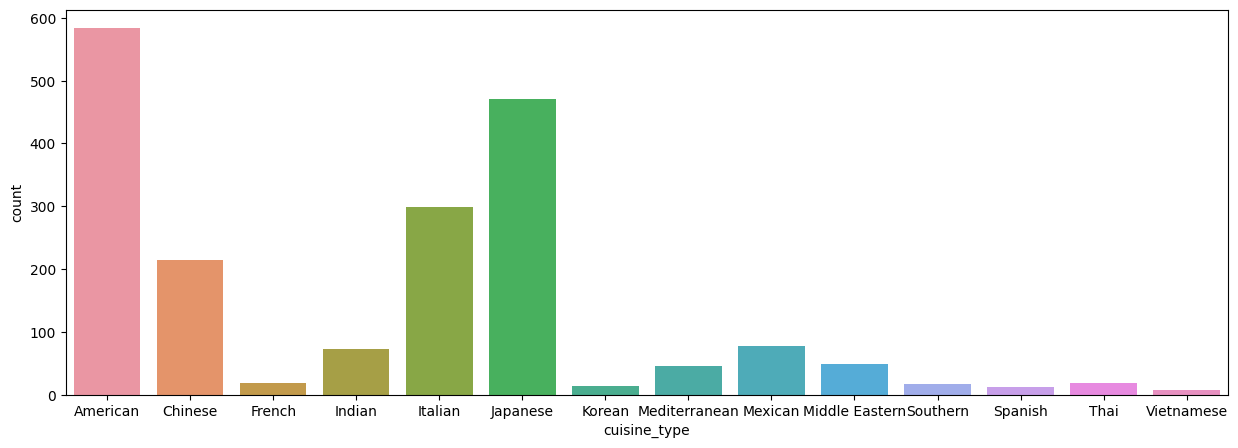

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type'); ## Create a countplot for cuisine type.

* Observations: The *American cuisine is the most popular, followed by Japenese*.
* Among all cuisine types, *American, Japanse, Italian, Chinese are top 4 cusines in the order (top to bottom), and there is a close tie between Mexican and Indian cuisines.*


#### Cost of the order

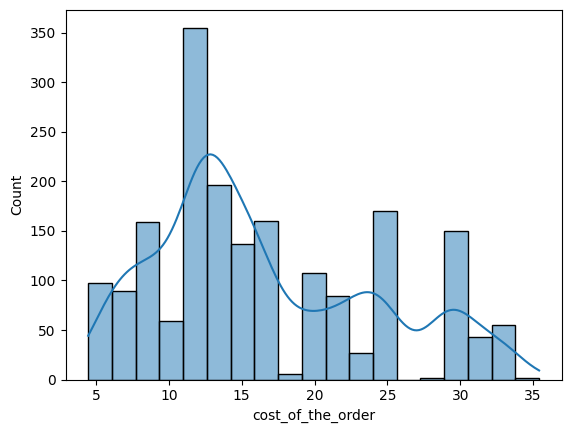

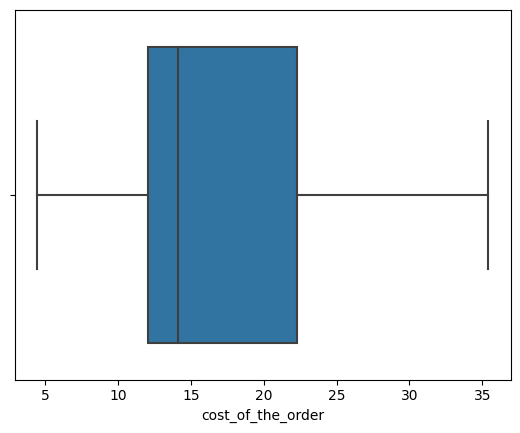

In [ ]:
sns.histplot(data=df,x='cost_of_the_order', kde = True) ## Histogram for the cost of order
plt.show();
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show();

* Observations:
* The distribution of the cost of the order is skewed towards right.
* There are no outliers present in this column.
* The boxplot shows the cost of the order ranging from 5 USD to 35 USD.

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].unique() ## Code to check unique values for the 'day_of_the_week' column

['Weekend', 'Weekday']
Categories (2, object): ['Weekday', 'Weekend']

* Observations:
* The following are the **2 unique values** in this column:  1. **Weekend**. 2. **Weekday**.

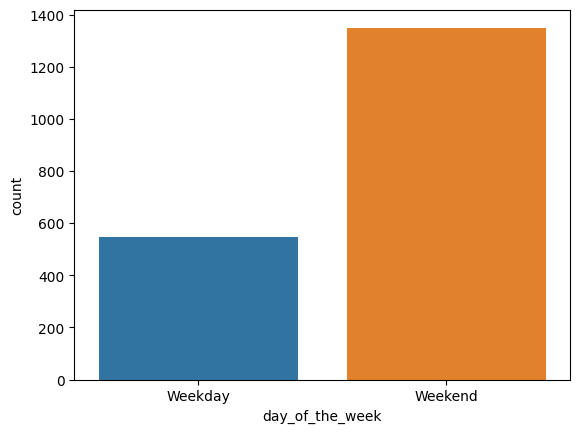

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week'); ## Code to plot a bar graph for 'day_of_the_week' column


* Observations:
* We have given day_of_the_week as X axis and the count is shown on the Y axis.
* Distribution is skewed towards the right, indicating the weekend is the busy time and the order counts are high, compared to weekday.

#### Rating

In [ ]:
# Check the unique values
df['rating'].unique() ## Code to check unique values for the 'rating' column

['Not given', '5', '3', '4']
Categories (4, object): ['3', '4', '5', 'Not given']

* Observations: The **rating column has 4 unique values** as follows: **'Not given', '5', '3', '4**

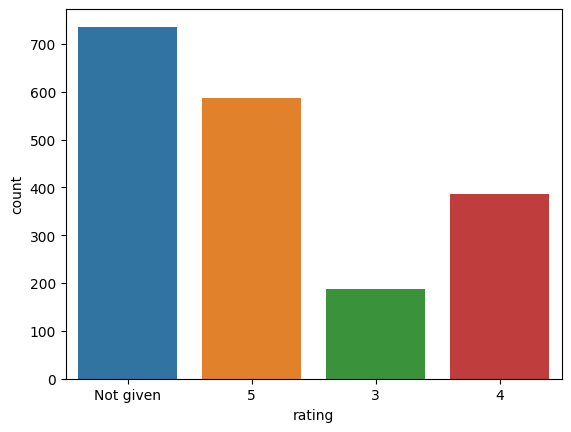

In [ ]:
sns.countplot(data = df, x = 'rating'); ## Code to plot bar graph for 'rating' column
plt.show()

* Observations: The countplot shows the number of orders not rated, 'Not given' are as high as 730 plus (based on the previous analysis it is 736) and the orders rated 5 are the top rating, followed by 4 and 3.

#### Food Preparation time

**NOTE: Since the Title shows, Food Preparation Time, while asking in the comments to provide code for the 'cost_of_the_order', I have decided to provide both.**

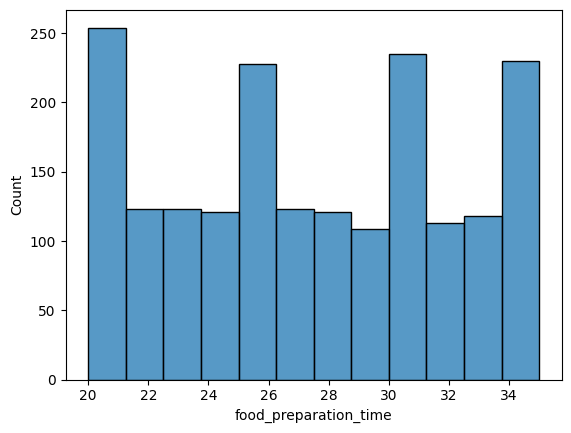

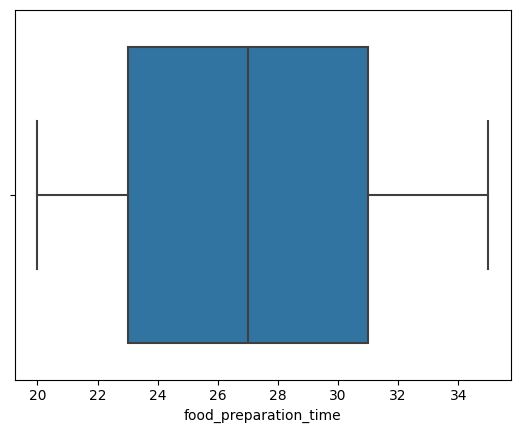

In [ ]:
sns.histplot(data=df,x='food_preparation_time') ## Code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Code to plot the boxplot for the cost of order
plt.show()


In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order', showmeans = True, showmode = True) ## Code to plot the boxplot for the cost of order
plt.show()

* Observations:
* **Food Preparation Time**: The food prep time **ranges from 20 to 37 minutes** and the Food preparatin is evenly distributed.
*  Cost of the Orders: The **Cost of the orders** is slightly **right skewed**. Boxplot shows the **median / average cost of the orders** is around **14 dollars**, while the **25th percentile cost of the orders** is at around **12 dollars** and the **75th percentile cost of the orde**r is around **22 dollars**.

#### Delivery time

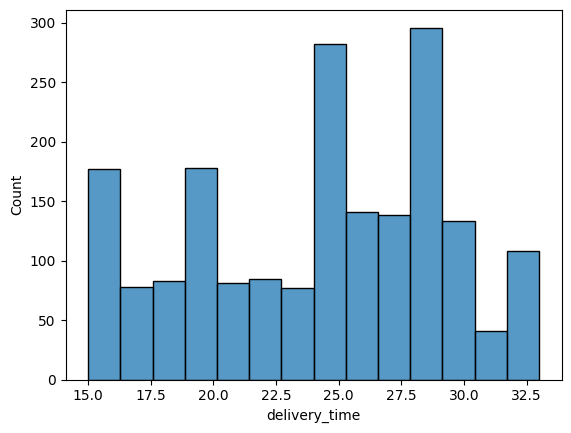

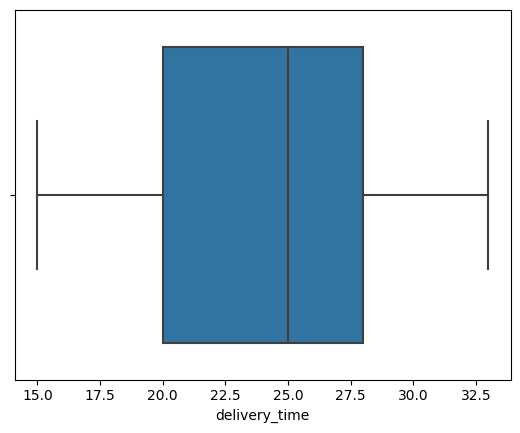

In [ ]:
sns.histplot(data=df,x='delivery_time') ## Code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Code to plot the boxplot for the delivery time
plt.show()

* Observations: Histplot shows that the delivery time ranges from 20 to approximately, 28 minutes and the **median / average time** it take to deliver the food is **25 minutes**.

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head() ## Code

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

* Observations:
* We listed **top 5 restaurants** and those are **Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm**
* The top number of orders are placed for **Shake Shack** restaurant with **219 orders**, followed by **The Meatball Shop** with **132 orders**, **Blue Ribbon Sushi** with **119 orders**, **Blue Ribbon Fried Chicken** with **96 orders**, and **Parm** with **68 orders**.

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() ## Code to check unique values for the cuisine type on weekend

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [ ]:
df.most_popular_cuisine = cuisine_counts.idxmax()


NameError: ignored

* Observations: The **most popular cuisine** over the **weekends** is **American** with order counts standing at **415 orders**

In [ ]:
## Get 5 most popular cuisine on weekends
df_weekend['cuisine_type'].value_counts().head()

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

* Observations: **American, Japanese, Italian, Chinese, Mexican are the most poular 5 restaurant cuisines**, while American is at the top and Mexican stands at the 5th in the list.

In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [ ]:
type(df_greater_than_20)

pandas.core.frame.DataFrame

* Observations: The number of **Total Orders that cost above 20 dollars is 555**, and **Percentage of the Orders above 20 dollars is 29.24 %**

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


* Observations: **The mean delivery time** for this dataset **is 24.16 minutes**

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head()  ## Write the appropriate column name to get the top 5 cmost frequent customers

52832     13
47440     10
83287      9
250494     8
65009      7
Name: customer_id, dtype: int64

* Observations: The **top 5 most frequent customers** with customer_ids, **52832** (placed 13 orders), **47440** (placed 10 orders), **83287** (placed 9 orders), **250494** (placed 8 orders), **65009** (placed 7 orders).

### Multivariate Analysis

#### Cuisine vs Cost of the order

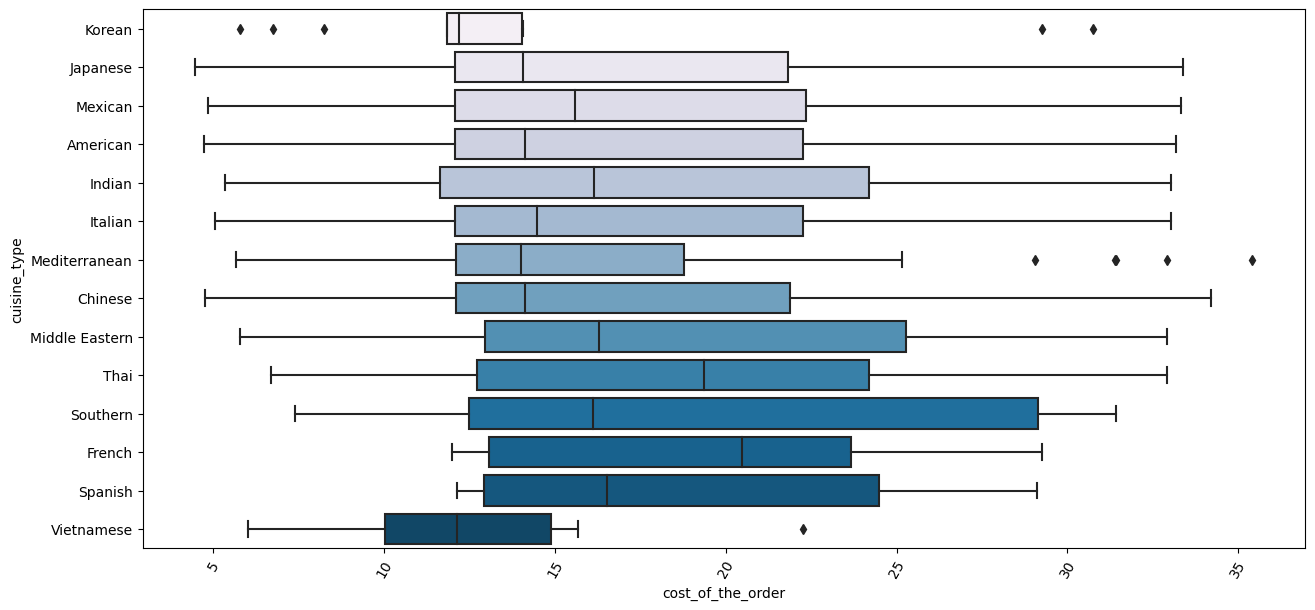

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cost_of_the_order", y = "cuisine_type", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

* Observations:
* **Boxplot shows that the most cuisines are right skewed, except for the Vietnamese and Korean which are slightly left skewed.**
* **Korean, Mediterrarean and Vietnamese have varying degree of outliers to the right, with Korean having outliers on both sides.**

#### Cuisine vs Food Preparation time

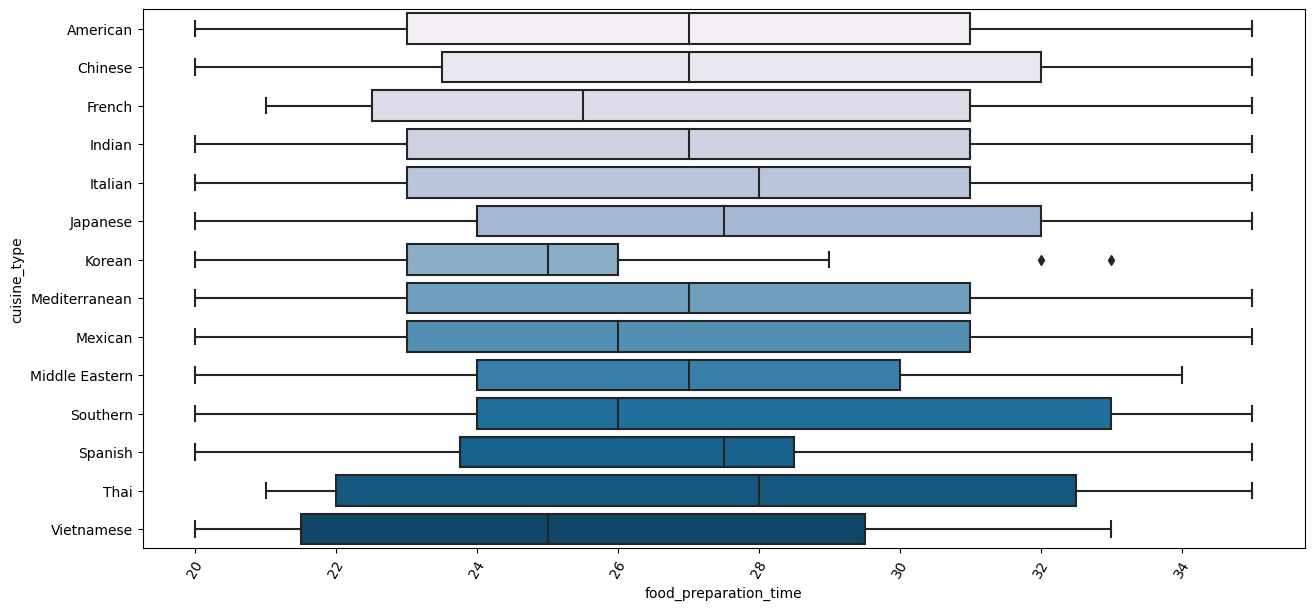

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "food_preparation_time", y = "cuisine_type", data = df, palette = 'PuBu')  ## Code to visualize the relationship between food preparation time and cuisine type
# using boxplot
plt.xticks(rotation = 60)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Observations:
* **Most cuisine types having various ranges of food preparation time, while some cuisines prepare the food faster, while others take little longer.**
* **Out of all cuisines, Korean is having some outliers on the rigt side, indicating some orders take more than their usual time for the preparation.**

#### Day of the Week vs Delivery time

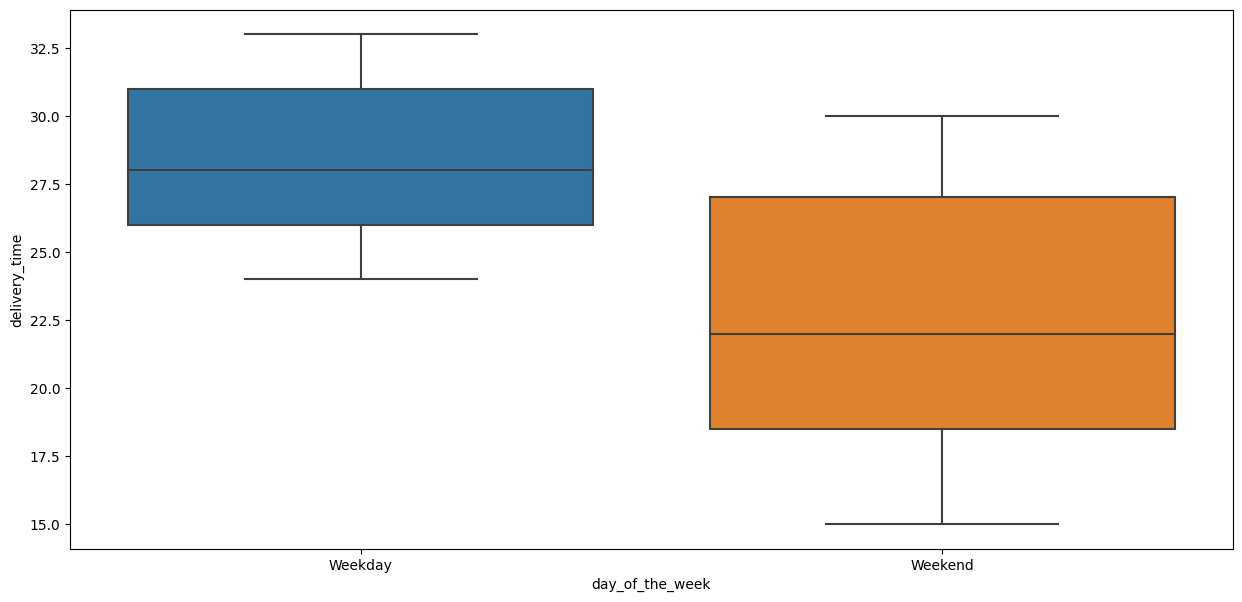

In [ ]:
# Relationship between day of the week and delivery time  data=data,x='Distance_bins',y='Price'
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')  ## Code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

* Observations:
* The above boxplot shows the weekend delivery time takes little longer than on a weekday.

#### Code and write your observations on the revenue generated by the restaurants.

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

* Observations:
* Top **5 restaurations generating revenues** among the above output are:
* **Shake Shack with revenue 3579.53 dollars**
* **The Meatball Shop  with revenue  2145.21 dollars**
* **Blue Ribbon Sushi  with revenue  1903.95 dollars**
* **Blue Ribbon Fried Chicken  with revenue 1662.29 dollars**
* **Parm with revenue 1112.76 dollars**

#### Rating vs Delivery time

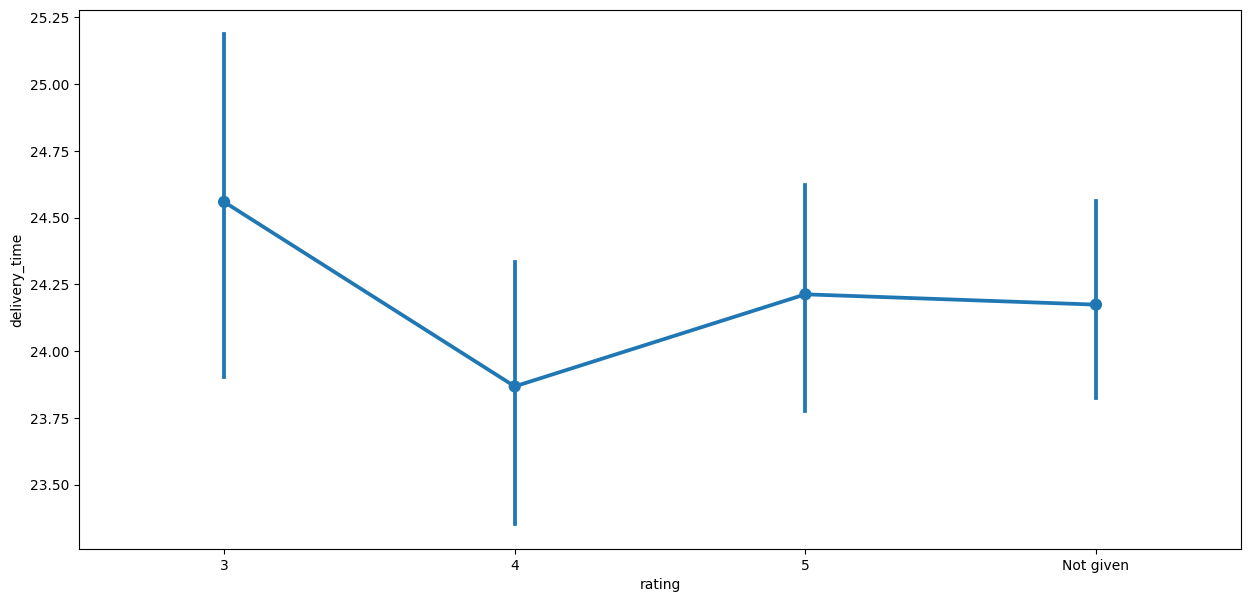

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show();

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxenplot(x = 'rating', y = 'delivery_time', showmeans =True, data = df)
plt.show();

* Observations:
* The above **pintplot shows orders rated at 3 took longer time to deliver than the the orders rated 5 while it is followed by the orders with 'Not given'.**
* **The orders that took shortest time to deliver were rated 4.**

#### Rating vs Food preparation time

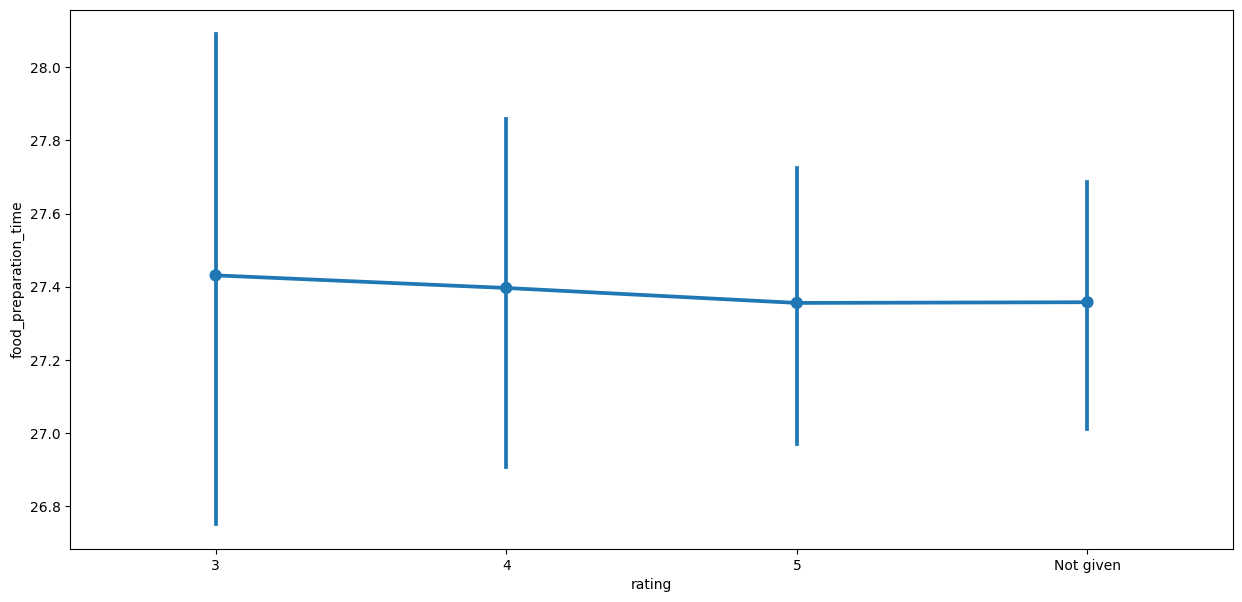

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Code to visualize the relationship between rating and food preparation time using pointplot
plt.show();

* Observations:
* **The rating vs food preparation time shows the a little time variation between the orders not rated (Not given), vs orders rated at 3**. However, **the overall time variation betwen not rated vs top time consusming orders that are rated 3 not more than few minutes differnce.**

#### Rating vs Cost of the order

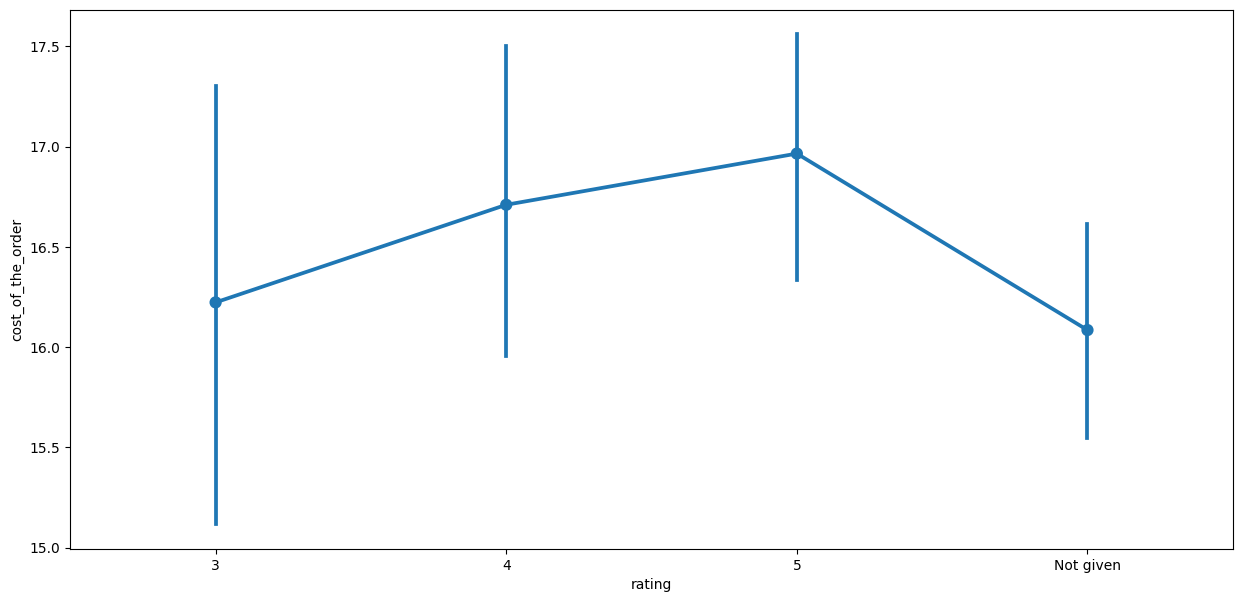

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## Code to visualize the relationship between rating and cost of the order using pointplot
plt.show();

* Observations: **The above pintpont shows an estimate of central tendency. Cost of the order between Not give vs 3 are variying slightly over few points, while the orders rated 5 are cosliest then the other orders, while orders rated 4 are trailing it in cost.**

#### Correlation among variables

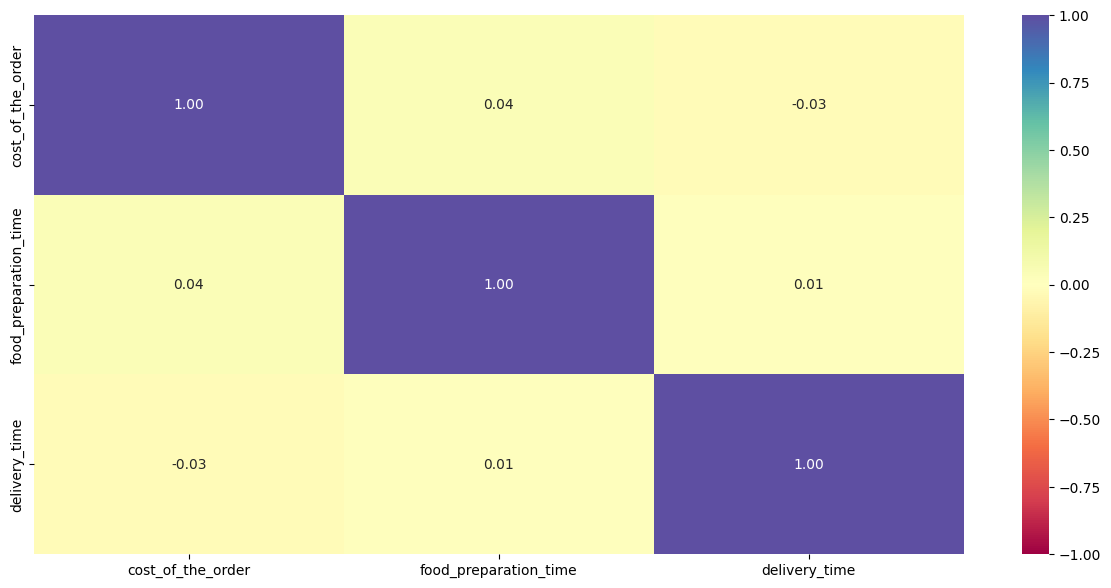

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();

* Observations:
* We have **3 variables, such as Cost of the Order, food preparation time and deivery time** and we careated a HeatMapt to visualize the correlation between these variables. The color and direction indicates the positive or negative correlation between the variables.
* **Food preparation time has positive correlation of 0.004 with cost of the order, though it is not strong correlation to consider.**
* **Overall these variables indicates a very weak correlation between them.**

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


* Observations:
* To find the restaurats that have rating count above 50 and average rating is above 4, we used the above code block to **filter the rated restaurants and convert them to integer.**
* Then **we created a dataframe with restaurant names with their ratings**.



In [ ]:
# Get the restaurant names that have rating count more than 50 #
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] ## Code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Code to find the mean rating



,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


* Observations Continued from the previoius code block.
* In this immediately above code block, we have achieved the following:
* **Get the restaurant names that have rating count above 50**
* **Then we found the mean rating of the restaurants**.

In [ ]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


* Observations: We have used above code to compute the net revenue.

In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


* Observations: **The total revenue generated** is **6166.3 dollars**.

In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

## Code to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

total_count = df['total_time'].count()
print(total_count);

orders_over60_mins = df['total_time'][df['total_time'] > 60].count()

orders_over60_percent = round((orders_over60_mins/total_count) * 100,2)

#orders_percentage_above60mins = round((df['total_time'] [df['food_preparation_time'] > 60].count()
#for i in df['total_time']:
# if i > 60:
#    orders_percentage = orders_percentage + 1

print('The percentage of orders took more than 60 minutes is: ', orders_over60_percent, '%')


1898
The percentage of orders took more than 60 minutes is:  10.54 %


* Observations: The **percentage of orders took more than 60 minutes to get delivered from the time the order placed**: **10.54 %**

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

## Code to get the mean delivery time on weekends and print it
print('The mean delivery time on Weekend is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')


The mean delivery time on weekdays is around 28 minutes
The mean delivery time on Weekend is around 22 minutes


day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


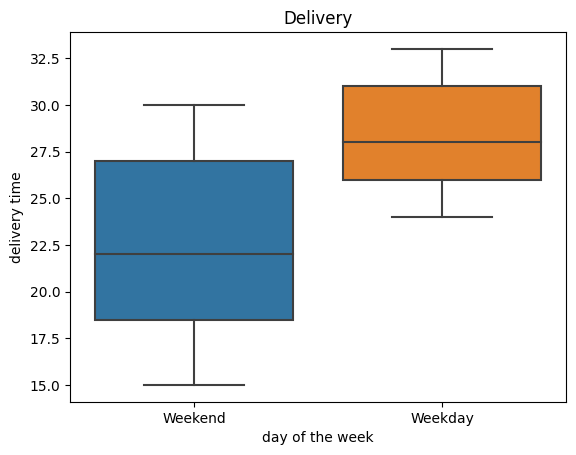

In [ ]:
sns.boxplot(x=df['day_of_the_week'], y=df['delivery_time'])
plt.ylabel('delivery time')
plt.xlabel('day of the week')
plt.title('Delivery')

mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

print(mean_delivery_time)

* Observations: The **mean delivey time on Weekday** is around **28 minutes** and on over **weekend** is **22 minutes**.

### Conclusion and Recommendations

## **Conclusions:**

• Total count of observations we analyzed are 1898 Orders.

• Cost Of the Order: Average cost of the order is 15 dollars, 25% of orders are around 12
dollars, 50% of the orders cost is 14.14 dollars, 75% cost of the orders are at 22.30 dollars.

The Standard Deviation between the cost of orders is 7.48 dollars.

• **Food Preparation Time:**

• The Average Food preparation time is approximately 27.37 mintues and the prep time is ranging
from 20 to 35 minutes. The Standard Deviation of prep time is 4.63 minutes.

• **Delivery Time:** The delivery time is ranging from 15 to 33 minutes and the average time to
deliver the food is approximately 24.16 minutes with a Standard Deviation of 4.97 minutes.


• **Food Preparation Time:** The food prep time ranges from 20 to 37 minutes and the Food preparatin is
evenly distributed.

• Cost of the Orders:** The Cost of the orders is slightly right skewed. Boxplot shows the median /
average cost of the orders is around 14 dollars, while the 25th percentile cost of the orders is at
around 12 dollars and the 75th percentile cost of the order is around 22 dollars.

• The delivery time ranges from 20 to approximately, 28 minutes and the median / average time it
take to deliver the food is 25 minutes.

• Top 5 restaurants and those are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon
Fried Chicken and Parm

• The top number of orders are placed for Shake Shack restaurant with 219 orders, followed by The
Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried
Chicken with 96 orders, and Parm with 68 orders.

• The number of total orders that cost above 20 dollars is: 555

• Percentage of orders above 20 dollars: 29.24 %


• The American cuisine is the most popular, followed by Japenese.

• Among all cuisine types, American, Japanse, Italian, Chinese are top 4 cusinesin the order (top to bottom),
and there is a close tie between Mexican and Indian cuisines.

• The percentage of orders took more than 60 minutes to get delivered from the time the order
placed: 10.54 %

• The number of orders not rated, 'Not given' are 736 and the orders rated 5 are the top rating,
followed by 4 and 3.

• The mean delivery time on Weekday is around 28 minutes and on over weekend is 22 minutes.

• The major part of the orders were placed during the weekend.



## Recommendations:

**Conclusions and Recommendation:**

• Understand why customers 'Not given' means the customer has not rated the respective order and
it is not a missing value. We can improve customer participation by offering incentives or making the
rating option on the UI easy to use or any other UI User Experience improvment to rate the order.
Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

• We can improve customers rating participation by offering incentives or making the rating option on
the UI easy to use or any other UI User Experience improvement to easily rate the order.
• Start conversations with the customers who have not rated and ask how to buy their confidence in
the app and suggestions to make their participation rewarding.
• First focus on Weekend orders and reach out to the customers for this analysis and implement their
suggestions.
• Improve delivery times.
• Offer incentives such as one free delivery if they reach certain number of orders and have rated the
orders.
